In [1]:
import pandas as pd

# Creating the URL to fetch data from Yahoo Finance
symbol = "BTC-USD"
interval = "1h"
period = "3mo"
url = f"https://query1.finance.yahoo.com/v8/finance/chart/{symbol}?interval={interval}&range={period}"

# Fetching the data
response = pd.read_json(url)

# Processing the data
df = pd.DataFrame(response["chart"]["result"][0]["indicators"]["quote"][0])
df["timestamp"] = response["chart"]["result"][0]["timestamp"]

# Converting Unix timestamps to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Saving the data as CSV
df.to_csv("btc_usdt_data.csv", index=False)


In [2]:
import pandas as pd

# Calculate percentage change as candlestick change
df["PctChange"] = df["close"].pct_change() * 100

# Set the first row's percentage change as NaN
df.loc[0, "PctChange"] = 0

# Save the data with percentage change as CSV
df.to_csv("btc_usdt_data_with_pct_change.csv", index=False)

    
# Display the last 10 rows
print(df.tail(10))

              high       volume           low          open         close  \
2200  30644.109375   11874304.0  30419.296875  30601.869141  30459.607422   
2201  30531.214844          0.0  30437.730469  30453.050781  30477.902344   
2202  30556.808594          0.0  30474.136719  30474.136719  30500.802734   
2203  30639.820312          0.0  30446.363281  30496.746094  30535.990234   
2204  30610.484375   24939520.0  30515.318359  30539.128906  30572.707031   
2205  30596.470703  112037888.0  30490.560547  30563.767578  30596.470703   
2206  30632.925781  588941312.0  30273.216797  30595.830078  30404.148438   
2207  30442.902344  553745408.0  30369.322266  30406.349609  30416.703125   
2208  30447.185547  519322624.0  30411.988281  30412.480469  30441.464844   
2209  30441.064453          0.0  30441.064453  30441.064453  30441.064453   

               timestamp  PctChange  
2200 2023-06-29 14:00:00  -0.241386  
2201 2023-06-29 15:00:00   0.060063  
2202 2023-06-29 16:00:00   0.075138  


In [3]:
# Shift the "PctChange" feature by 1 to 5 steps
for i in range(1, 6):
    df[f"PctChange_{i}"] = df["PctChange"].shift(i)

# Save the data with shifted percentage changes as CSV
df.to_csv("btc_usdt_data_with_shifted_pct_change.csv", index=False)

print(df.tail(10))

              high       volume           low          open         close  \
2200  30644.109375   11874304.0  30419.296875  30601.869141  30459.607422   
2201  30531.214844          0.0  30437.730469  30453.050781  30477.902344   
2202  30556.808594          0.0  30474.136719  30474.136719  30500.802734   
2203  30639.820312          0.0  30446.363281  30496.746094  30535.990234   
2204  30610.484375   24939520.0  30515.318359  30539.128906  30572.707031   
2205  30596.470703  112037888.0  30490.560547  30563.767578  30596.470703   
2206  30632.925781  588941312.0  30273.216797  30595.830078  30404.148438   
2207  30442.902344  553745408.0  30369.322266  30406.349609  30416.703125   
2208  30447.185547  519322624.0  30411.988281  30412.480469  30441.464844   
2209  30441.064453          0.0  30441.064453  30441.064453  30441.064453   

               timestamp  PctChange  PctChange_1  PctChange_2  PctChange_3  \
2200 2023-06-29 14:00:00  -0.241386    -0.274679    -0.162321    -0.109067

In [4]:
# Create a new column with binary values based on the percentage change
df["TargetChange"] = df["PctChange"].apply(lambda x: 1 if x >= 0 else 0)

print(df.tail(10))

              high       volume           low          open         close  \
2200  30644.109375   11874304.0  30419.296875  30601.869141  30459.607422   
2201  30531.214844          0.0  30437.730469  30453.050781  30477.902344   
2202  30556.808594          0.0  30474.136719  30474.136719  30500.802734   
2203  30639.820312          0.0  30446.363281  30496.746094  30535.990234   
2204  30610.484375   24939520.0  30515.318359  30539.128906  30572.707031   
2205  30596.470703  112037888.0  30490.560547  30563.767578  30596.470703   
2206  30632.925781  588941312.0  30273.216797  30595.830078  30404.148438   
2207  30442.902344  553745408.0  30369.322266  30406.349609  30416.703125   
2208  30447.185547  519322624.0  30411.988281  30412.480469  30441.464844   
2209  30441.064453          0.0  30441.064453  30441.064453  30441.064453   

               timestamp  PctChange  PctChange_1  PctChange_2  PctChange_3  \
2200 2023-06-29 14:00:00  -0.241386    -0.274679    -0.162321    -0.109067

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Remove rows with missing values
df = df.dropna()

# Define the features and target variables
features = df[["PctChange_1", "PctChange_2", "PctChange_3", "PctChange_4", "PctChange_5"]]
target = df["TargetChange"]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [6]:
# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)


SVC()

In [7]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5105882352941177


In [8]:
print(df.tail(10))

              high       volume           low          open         close  \
2200  30644.109375   11874304.0  30419.296875  30601.869141  30459.607422   
2201  30531.214844          0.0  30437.730469  30453.050781  30477.902344   
2202  30556.808594          0.0  30474.136719  30474.136719  30500.802734   
2203  30639.820312          0.0  30446.363281  30496.746094  30535.990234   
2204  30610.484375   24939520.0  30515.318359  30539.128906  30572.707031   
2205  30596.470703  112037888.0  30490.560547  30563.767578  30596.470703   
2206  30632.925781  588941312.0  30273.216797  30595.830078  30404.148438   
2207  30442.902344  553745408.0  30369.322266  30406.349609  30416.703125   
2208  30447.185547  519322624.0  30411.988281  30412.480469  30441.464844   
2209  30441.064453          0.0  30441.064453  30441.064453  30441.064453   

               timestamp  PctChange  PctChange_1  PctChange_2  PctChange_3  \
2200 2023-06-29 14:00:00  -0.241386    -0.274679    -0.162321    -0.109067

In [9]:
# Örnek bir tahmin yapma
sample = [[0.05, 0.40, -0.06, -0.12, -0.04]]
sample2 = [[0.40, -0.06, -0.12, 0.04, 0.17]]
sample3 = [[-0.06, -0.12, 0.04, 0.17, 0.02]]
sample4 = [[-0.4, -0.23, 0.39, 1.67, 2.30]]
sample5 = [[-0.23, 0.39, 1.67, 2.30, 7.11]]
sample5 = [[-0.23, 0.39, 1.67, 2.30, 7.11]]


prediction = svm.predict(sample)
prediction2 = svm.predict(sample2)
prediction3 = svm.predict(sample3)
prediction4 = svm.predict(sample4)
prediction5 = svm.predict(sample5)

print("Prediction:", prediction)
print("Prediction2:", prediction2)
print("Prediction3:", prediction3)
print("Prediction4:", prediction4)
print("Prediction5:", prediction5)

Prediction: [1]
Prediction2: [1]
Prediction3: [1]
Prediction4: [1]
Prediction5: [1]


In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Veri setini yükleme ve özellikleri/hedefi ayırma
features = df[["PctChange_1", "PctChange_2", "PctChange_3", "PctChange_4", "PctChange_5"]]
target = df["TargetChange"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma
rf = RandomForestClassifier()

# Modeli eğitme
rf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Duyarlılık (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Skoru
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Karmaşıklık Matrisi (Confusion Matrix)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.548235294117647
Precision: 0.5759162303664922
Recall: 0.497737556561086
F1 Score: 0.5339805825242718
Confusion Matrix:
 [[123  81]
 [111 110]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Grid Search için parametre aralıklarını belirleme
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Random Forest modelini oluşturma
rf = RandomForestClassifier()

# Grid Search yapılandırması ve modeli eğitme
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(features, target)

# En iyi parametreleri ve performansı ekrana yazdırma
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.5720932297447281


C:\Users\brnhz\AppData\Local\Temp\ipykernel_5452\1468616984.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


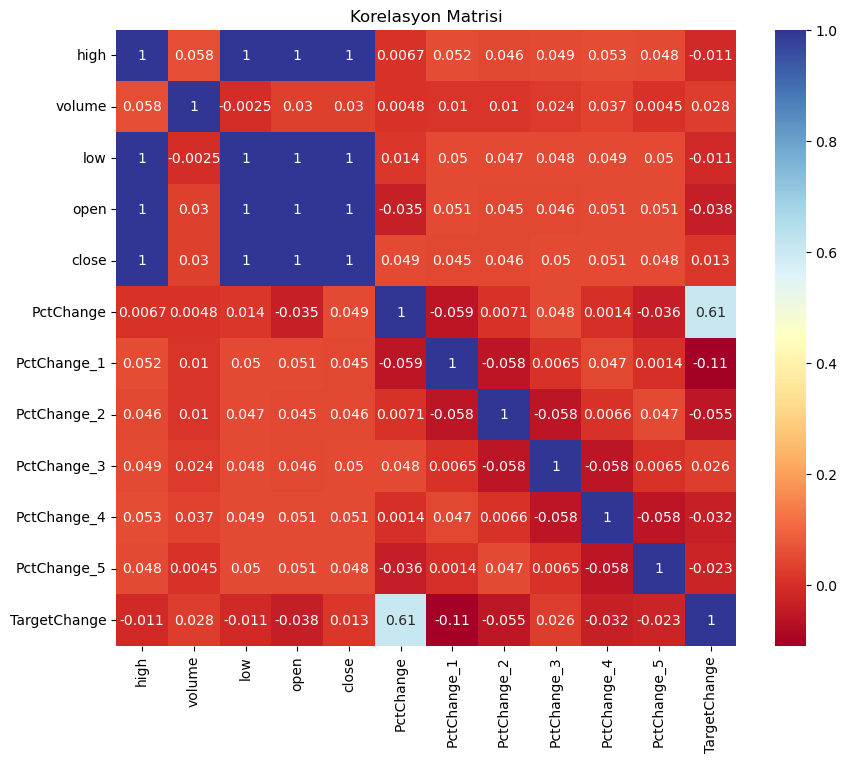

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = df.corr()

# Korelasyon matrisini heatmap olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Korelasyon Matrisi")
plt.show()
